<center><h1 style="color: #4A90E2;">Wetland Distribution Across Latin America and the Caribbean</h1></center>

<center>
    <p style="color: #777777; font-size: 16px;">
        Source: <a href="https://rsis.ramsar.org/" style="color: #4A90E2; text-decoration: none; border-bottom: 1px solid #4A90E2;" onmouseover="this.style.color='#2C6EBD';" onmouseout="this.style.color='#4A90E2';">Ramsar Sites Information</a>
    </p>
    <p style="color: #777777; font-size: 16px;">
        Dependencies: <span style="color: #4A90E2;">pandas</span>, <span style="color: #4A90E2;">matplotlib</span>
    </p>
    
</center>

In [5]:
import configparser

# initiate the config parser
config = configparser.ConfigParser()

# read the config ini file
config.read('config.ini')

# access the file path
csv_file_path = config['paths']['csv_wetland_v1']


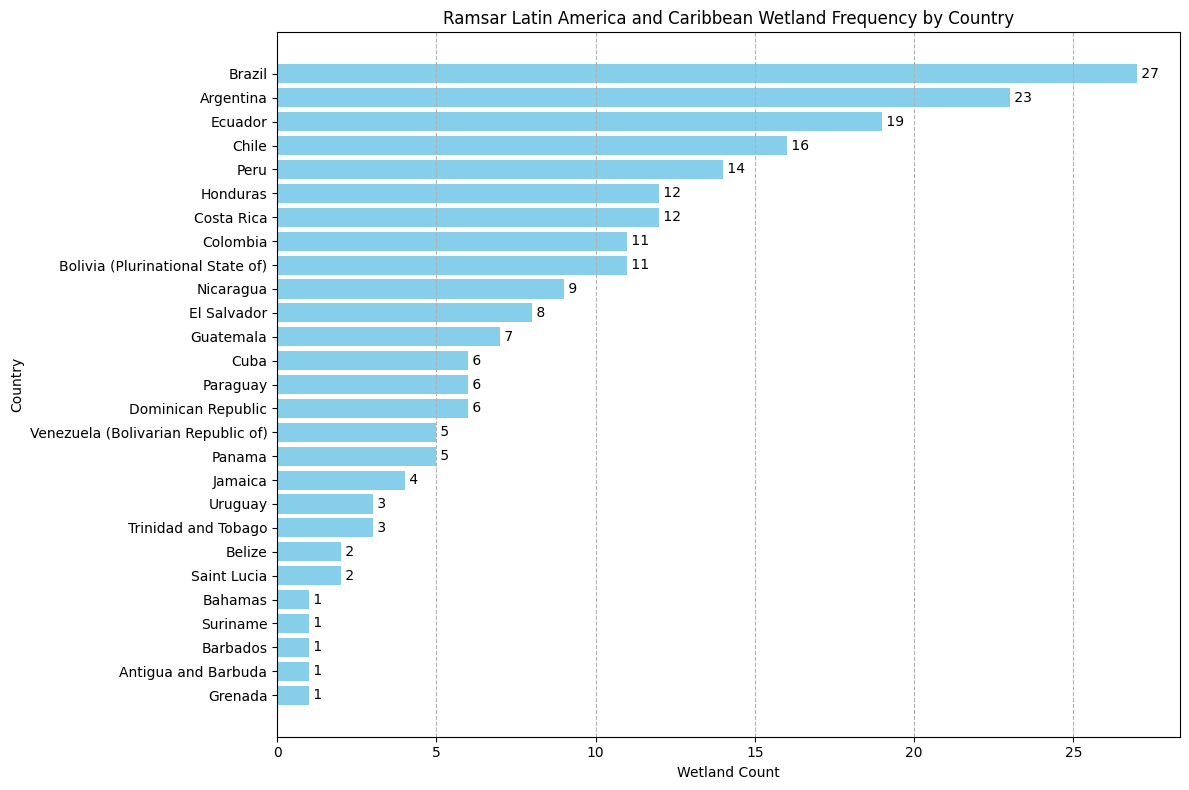

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv(csv_file_path, encoding='UTF-8-SIG')

# Group by country and count the occurrences, then sort in descending order
wetland_counts = df['Country'].value_counts().sort_values(ascending=True)

# Create a DataFrame for easier manipulation
wetland_counts_df = pd.DataFrame(wetland_counts).reset_index()
wetland_counts_df.columns = ['Country', 'Wetland Count']


# Create a bar chart with specified colors
plt.figure(figsize=(12, 8))
plt.barh(wetland_counts_df['Country'], wetland_counts_df['Wetland Count'], color='skyblue')

# Add titles and labels
plt.title('Ramsar Latin America and Caribbean Wetland Frequency by Country')
plt.xlabel('Wetland Count')
plt.ylabel('Country')
plt.grid(axis='x', linestyle='--', alpha=1.0)

# Add counts next to the country names
for index, value in enumerate(wetland_counts_df['Wetland Count']):
    plt.text(value, index, f' {value}', va='center')

plt.tight_layout()
plt.show()

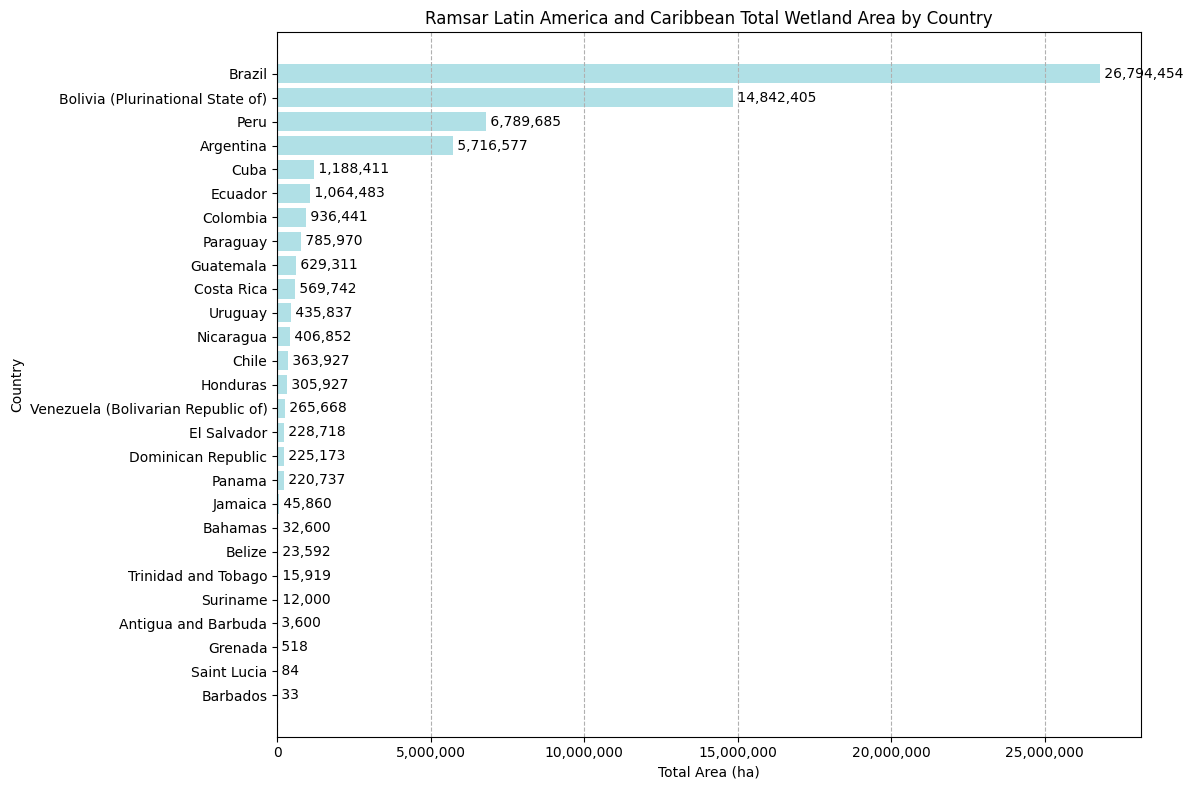

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

# Group by country and sum the area in hectares, then sort in descending order
total_area_by_country = df.groupby('Country')['Area (ha)'].sum().sort_values(ascending=True)

# Create a DataFrame for easier manipulation
area_by_country_df = pd.DataFrame(total_area_by_country).reset_index()
area_by_country_df.columns = ['Country', 'Total Area (ha)']

# Create a formatter function for readability
def thousands_formatter(x, pos):
    return f'{int(x):,}'  # Format with commas

# Create a bar chart with specified colors
plt.figure(figsize=(12, 8))
plt.barh(area_by_country_df['Country'], area_by_country_df['Total Area (ha)'], color='powderblue')

# Add titles and labels
plt.title('Ramsar Latin America and Caribbean Total Wetland Area by Country')
plt.xlabel('Total Area (ha)')
plt.ylabel('Country')
plt.grid(axis='x', linestyle='--', alpha=1.0)

# Add total area next to the country names
for index, value in enumerate(area_by_country_df['Total Area (ha)']):
    plt.text(value, index, f' {int(value):,}', va='center')  # Format with commas for readability

# Apply the formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.tight_layout()
plt.show()